# Ejercicio: Mapa de imágenes usando técnicas no lineales

Dimensionality reduction  
Curso: Big data con Python (2019)  
Profesor: Steven Van Vaerenbergh  
Universidad de Cantabria  

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

from mpl_toolkits.mplot3d import Axes3D

# Módulo para medir el tiempo de ejecución
from time import time

%matplotlib inline

# Datos

In [2]:
# Cargamos los datos
from sklearn.datasets import load_digits

digits = load_digits()

# Contenidos del diccionario "digits"
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
# Tamaño del dataset
X = digits.data
X.shape

(1797, 64)

# a) Calcula un mapa de dígitos usando Isomap

In [0]:
# Parámetros de Isomap
n_neighbors = 20
n_components = 2

In [5]:
# Training de Isomap

t0 = time()

isomap = manifold.Isomap(n_neighbors, n_components)
Y_isomap = isomap.fit_transform(X)

t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))

Isomap: 3 sec


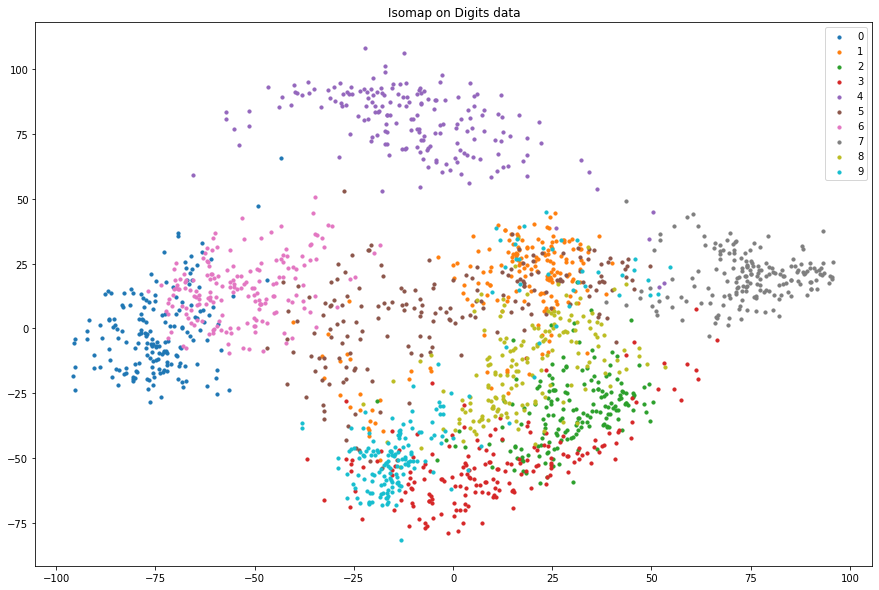

In [6]:
# Dibuja el mapa calculado

fig, ax = plt.subplots(figsize=[15,10])

for c in np.unique(digits.target):
    i = np.where(digits.target == c)
    
    # Dibuja todos los puntos de la clase i
    ax.scatter(Y_isomap[i,0], Y_isomap[i,1], label = c, s = 10)
    
ax.legend(loc='upper right')
plt.title("Isomap on Digits data")
plt.show()

# b) Calcula un mapa de dígitos usando LLE

In [0]:
# Parámetros de LLE
n_neighbors = 10
n_components = 2

In [9]:
# Training de LLE

t0 = time()

lle = manifold.LocallyLinearEmbedding(n_neighbors,n_components,method = "modified")
Y_lle = lle.fit_transform(X)

t1 = time()
print("LLE: %.2g seg" % (t1 - t0))

LLE: 1.2 seg


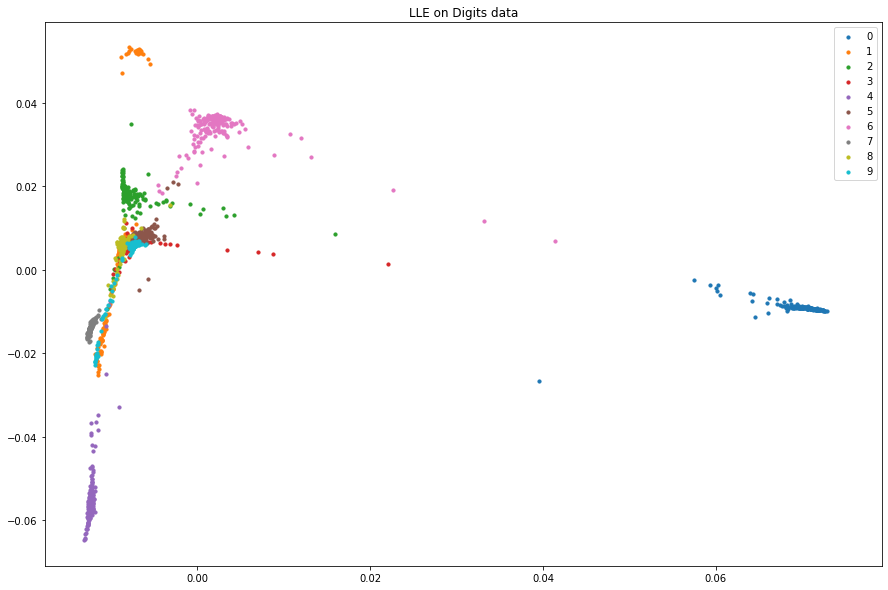

In [10]:
# Dibuja el mapa calculado

fig, ax = plt.subplots(figsize=[15,10])

for c in np.unique(digits.target):
    i = np.where(digits.target == c)
    
    # Dibuja todos los puntos de la clase i
    ax.scatter(Y_lle[i,0], Y_lle[i,1], label = c, s = 10)
    
ax.legend(loc='upper right')
plt.title("LLE on Digits data")
plt.show()

# c) Calcula un mapa de dígitos usando t-SNE

In [0]:
# Parámetros de t-SNE
n_components = 2
perplexity = 50

In [15]:
# Training de t-SNE

t0 = time()

tsne = manifold.TSNE(n_components,perplexity)
Y_tsne = tsne.fit_transform(X)

t1 = time()
print("t-SNE: %.2g seg" % (t1 - t0))

t-SNE: 14 seg


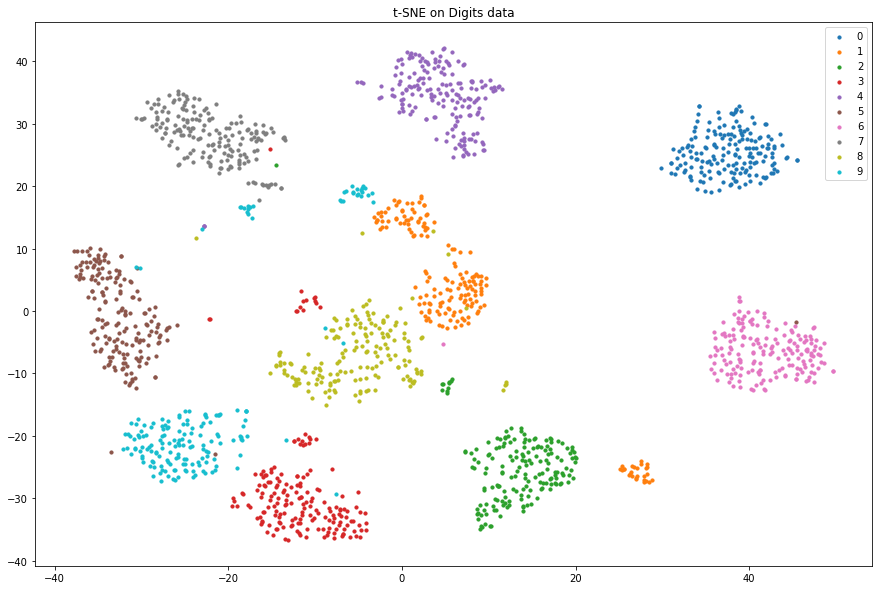

In [16]:
# Dibuja el mapa calculado

fig, ax = plt.subplots(figsize=[15,10])

for c in np.unique(digits.target):    
    i = np.where(digits.target == c)
    
    # Dibuja todos los puntos de la clase i
    ax.scatter(Y_tsne[i,0], Y_tsne[i,1], label = c, s = 10)
    
ax.legend(loc='upper right')
plt.title("t-SNE on Digits data")
plt.show()